# Tesseroid Forward Calculation with Variable Density in Depth

## One Tesseroid

We are going to try a simple forward calculation using one Tesseroid with linear variable density in depth.

**Import Packages**

In [1]:
from __future__ import division
import time
import numpy as np
from fatiando import gridder
from tesseroid_density import tesseroid
from fatiando.mesher import Tesseroid
import matplotlib.pyplot as plt

**Definition of density function**

In [2]:
def density(height):
   return 2e-3*height - 100

**Creation of computation grid and tesseroid model**

In [3]:
# Create tesseroid model
model = [Tesseroid(-66, -55, -30, -12, 0, -50000, props={'density': density})]

# Create the computation grid
area = (-80, -30, -40, 10)
shape = (100, 100)
lons, lats, heights = gridder.regular(area, shape, z=250000)

**Fields Calculation and Plot**

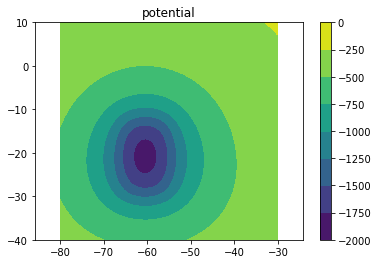

Time it took: 0.0687029361725


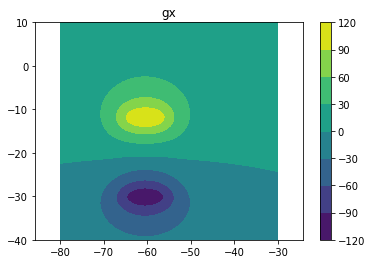

Time it took: 0.257137060165


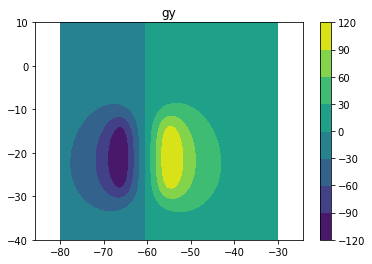

Time it took: 0.266405105591


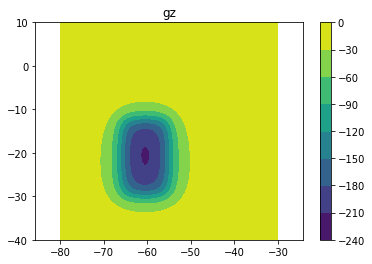

Time it took: 0.267927885056


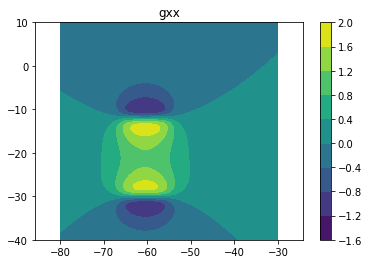

Time it took: 6.47631502151


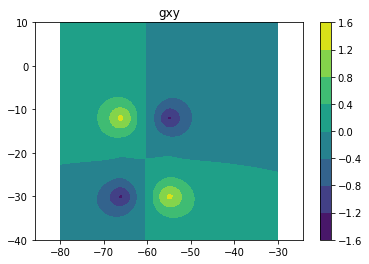

Time it took: 6.33608317375


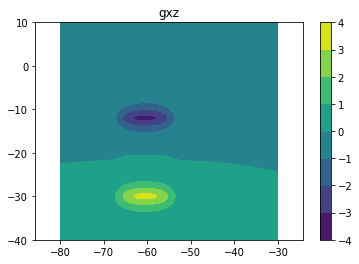

Time it took: 6.57057094574


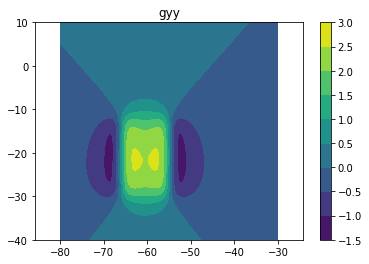

Time it took: 6.17227101326


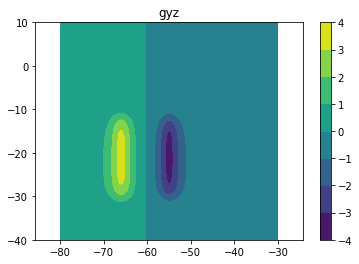

Time it took: 6.15298295021


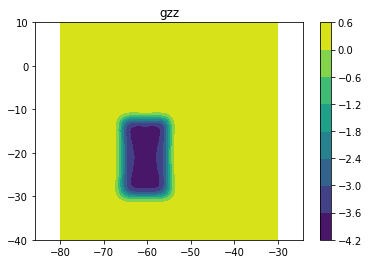

Time it took: 6.63245797157


In [4]:
fields = "potential gx gy gz gxx gxy gxz gyy gyz gzz".split()
for f in fields:
    start = time.time()
    result = getattr(tesseroid, f)(lons, lats, heights, model)
    end = time.time()

    plt.contourf(lons.reshape(shape), lats.reshape(shape), result.reshape(shape))
    plt.colorbar()
    plt.title(f)
    plt.axis('equal')
    plt.show()
    print "Time it took: %s" % (end - start)

## Tesseroid Mesh

Another option is to build our tesseroid model using a mesh of Tesseroids. We can set each tesseroid with variable density using a list of the functions. Moreover, we can mix constant and variable densities in the same mesh.

**Import extra class**

In [5]:
from fatiando.mesher import TesseroidMesh

**Define new density functions**

In [6]:
def density_new(height):
   return height/1000. - 100

**Construction of the tesseroid mesh**

In [7]:
model_shape = (3, 3, 3)
model = TesseroidMesh((-66, -55, -30, -12, 0, -50000), model_shape)
density_list = [density for i in range(model.size)]
density_list[0] = 200
density_list[1] = density_new
model.addprop('density', density_list)

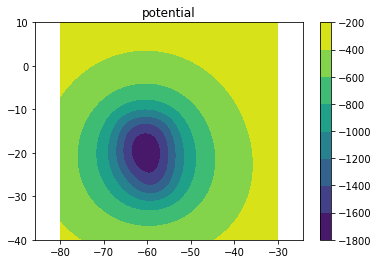

Time it took: 0.768971920013


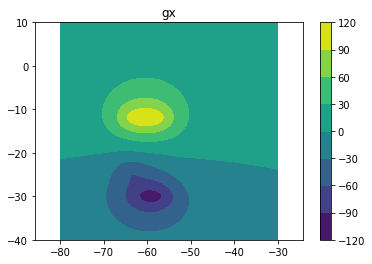

Time it took: 1.25295805931


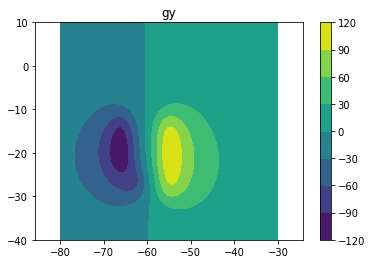

Time it took: 1.20695900917


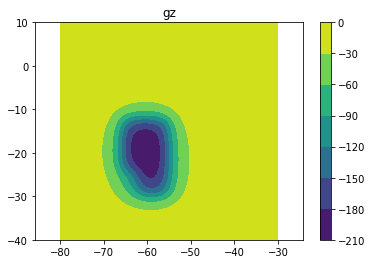

Time it took: 1.23440599442


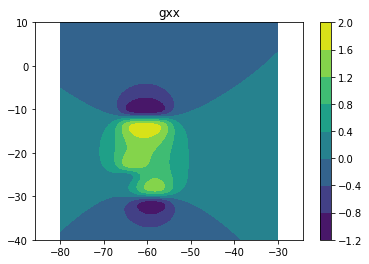

Time it took: 15.6514911652


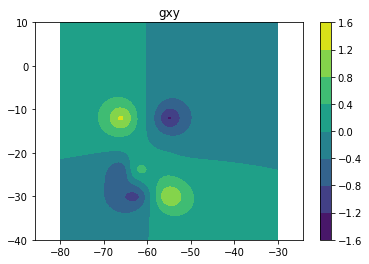

Time it took: 15.234855175


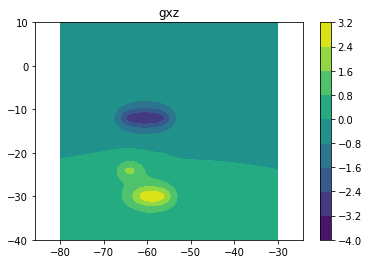

Time it took: 15.589017868


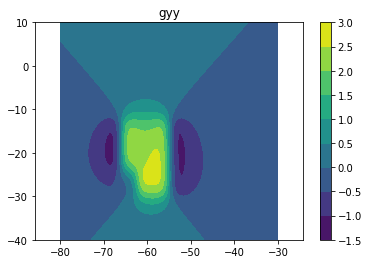

Time it took: 15.4959609509


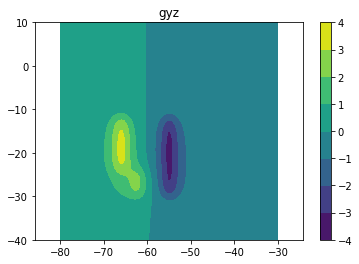

Time it took: 15.3630559444


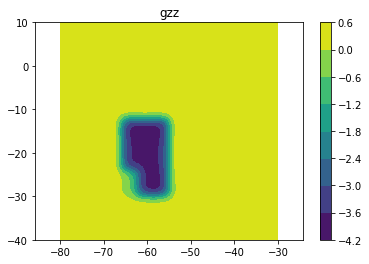

Time it took: 15.677366972


In [8]:
fields = "potential gx gy gz gxx gxy gxz gyy gyz gzz".split()
for f in fields:
    start = time.time()
    result = getattr(tesseroid, f)(lons, lats, heights, model)
    end = time.time()

    plt.contourf(lons.reshape(shape), lats.reshape(shape), result.reshape(shape))
    plt.colorbar()
    plt.title(f)
    plt.axis('equal')
    plt.show()
    print "Time it took: %s" % (end - start)